In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Which countries are F1 constructors from?

In [27]:
constructors = pd.read_csv('constructors.csv', dtype = {'nationality': str})
constructors

,constructorId,constructorRef,name,nationality,url,Unnamed: 5
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,NaN
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,NaN
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,NaN
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_F1,NaN
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso,NaN
5,6,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari,NaN
6,7,toyota,Toyota,Japanese,http://en.wikipedia.org/wiki/Toyota_Racing,NaN
7,8,super_aguri,Super Aguri,Japanese,http://en.wikipedia.org/wiki/Super_Aguri_F1,NaN
8,9,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing,NaN
9,10,force_india,Force India,Indian,http://en.wikipedia.org/wiki/Force_India,NaN


In [59]:
#find the number of unique nationalities represented
len(constructors.groupby('nationality').count()['constructorRef'])

24

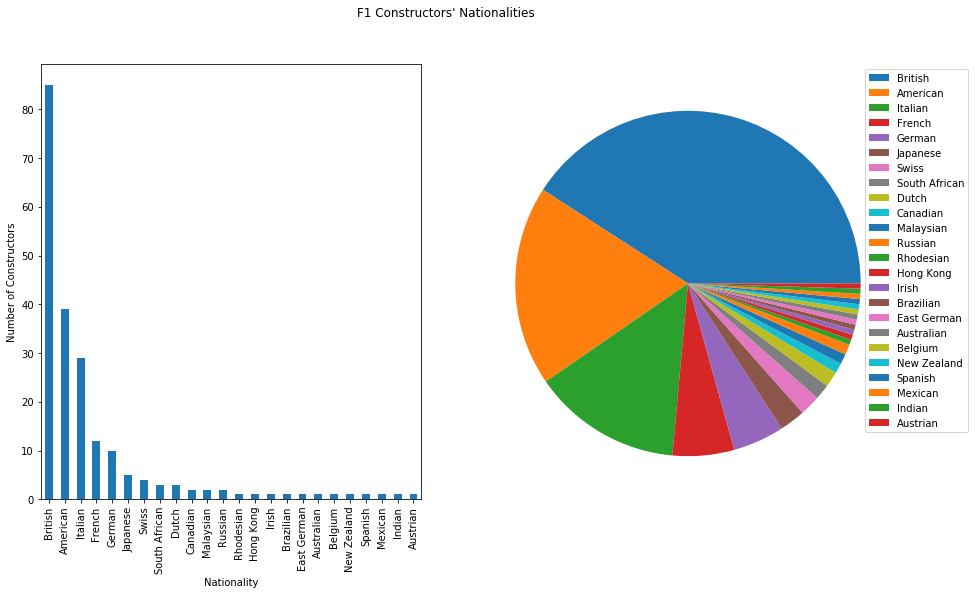

In [66]:
countries = pd.DataFrame(constructors.nationality.value_counts(), columns = ['nationality'])

plt.figure(figsize = (15,8))
plt.suptitle('F1 Constructors\' Nationalities')

plt.subplot(1,2,1)
constructors.nationality.value_counts().head(24).plot(kind = 'bar')
plt.xlabel('Nationality')
plt.ylabel('Number of Constructors')

plt.subplot(1,2,2)
plt.pie(countries)
plt.axis('equal')
plt.legend(countries.index, bbox_to_anchor = (1.25, 1), loc = 'upper right')
plt.show()